# START

We start quite easy with some toy examples on how deal with trending data.

Imagine we are given some coffee prices and want to analyze them.

Let’s get this data into Python to see how to plot this linear increasing trend

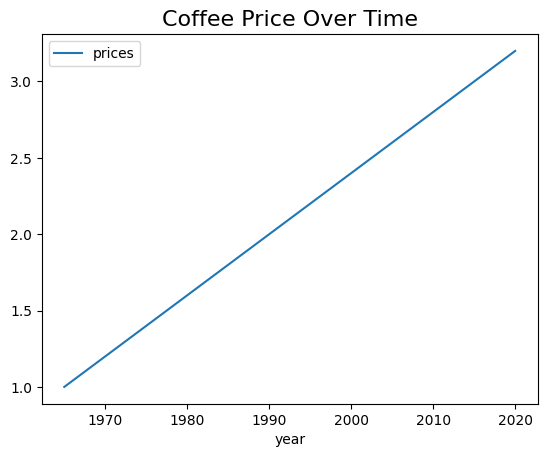

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

years = [1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
prices = [1.00, 1.20, 1.40, 1.60, 1.80, 2.00, 2.20, 2.40, 2.60, 2.80, 3.00, 3.20]

data = pd.DataFrame({
    'year' : years,
    'prices': prices
})
ax = data.plot.line(x='year')
ax.set_title('Coffee Price Over Time', fontsize=16)
plt.show()

To make predictions for the price of coffee in this hypothetical town, you could
just put your ruler next to the graph and continue the upward line: the prediction for this variable does not need any explanatory variables other than its past values. The historical data of this example allows you to forecast the future. This is a determining characteristic of time series models.

Now let’s see a comparable example but with the prices of hot chocolate rather
than the prices of a cup of coffee and quarterly data rather than data every five years

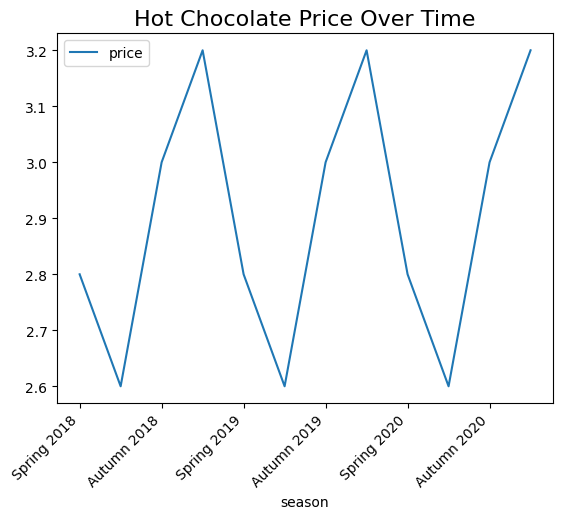

In [ ]:
seasons = ["Spring 2018", "Summer 2018", "Autumn 2018", "Winter 2018",
           "Spring 2019", "Summer 2019", "Autumn 2019", "Winter 2019",
           "Spring 2020", "Summer 2020", "Autumn 2020", "Winter 2020"]
prices = [2.80, 2.60, 3.00, 3.20,
          2.80, 2.60, 3.00, 3.20,
          2.80, 2.60, 3.00, 3.20]

data = pd.DataFrame({
    'season': seasons,
    'price': prices
})

ax = data.plot.line(x='season')
ax.set_title('Hot Chocolate Price Over Time', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Do you see the trend? In the case of hot chocolate, you do not have a year-over-year increase in price, but you do detect seasonality: in the example, hot chocolate prices follow the temperatures of the seasons.

**Note:** Univariate time series models make predictions based on trends and
seasonality observed in their own past and do not use explanatory variables other than the target variable: the variable that you want to forecast. You can imagine numerous types of combinations of those two processes, for example, have both a quarterly seasonality and a linear increasing trend and so on. There are many types of processes that can be forecasted by modeling the historical values of the target variable

Now that you are familiar with the idea of using the past of one variable, you are going to discover a different approach to making models. You have just seen univariate time series models, which are models that use only the past of a variable itself to predict its future. Sometimes, this approach is not logical: processes do not always follow trends and seasonality. Some predictions that you would want to make may be dependent on other, independent sources of information: explanatory variables. In those cases, you can use a family of methods called supervised machine learning that allows you to model relationships between explanatory variables and a target variable.

To understand this case, you have the fictitious data that contains the sales amount of a company per quarter, with three years of historical data.

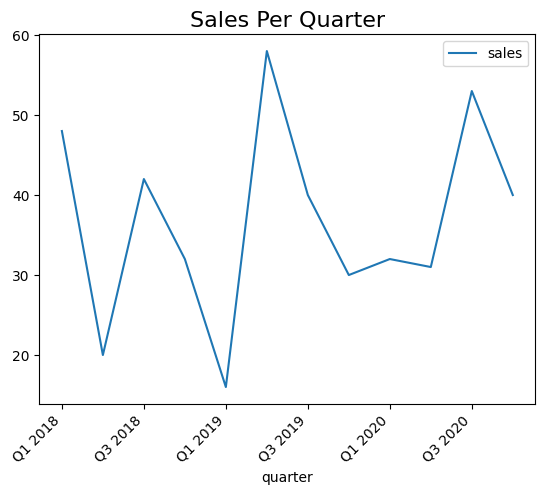

In [ ]:
quarters = ["Q1 2018", "Q2 2018", "Q3 2018", "Q4 2018",
            "Q1 2019", "Q2 2019", "Q3 2019", "Q4 2019",
            "Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020"]

sales = [48, 20, 42, 32,
         16, 58, 40, 30,
         32, 31, 53, 40]


data = pd.DataFrame({
    'quarter': quarters,
    'sales': sales
})

ax = data.plot.line(x='quarter')
ax.set_title('Sales Per Quarter', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

What you can see in this graph does not resemble the previous examples: there is
no clear linear trend (neither increasing nor decreasing), and there is no clear quarterly seasonality either. But as the data is about sales, you could imagine many factors that influence the sales that you’ll realize. Let’s look for explanatory variables that could help in explaining sales. In Table 1-4, the data have been updated with two explanatory variables: discount and advertising budget. Both are potential variables that could influence sales numbers.

Let’s have a look at whether it would be possible to use those variables for a
prediction of sales

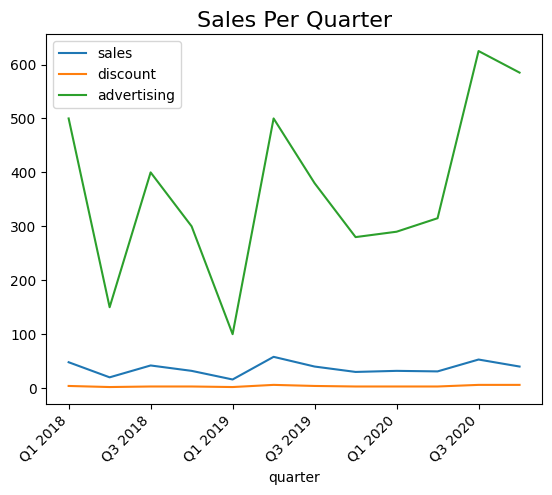

In [ ]:


quarters = ["Q1 2018", "Q2 2018", "Q3 2018", "Q4 2018",
            "Q1 2019", "Q2 2019", "Q3 2019", "Q4 2019",
            "Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020"]

sales = [48, 20, 42, 32,
         16, 58, 40, 30,
         32, 31, 53, 40]

discounts = [4,2,3,
             3,2,6,
             4,3,3,
             3,6,6]

advertising = [500,150,400,
               300,100,500,
               380,280,290,
               315,625,585]

data = pd.DataFrame({
    'quarter': quarters,
    'sales': sales,
    'discount': discounts,
    'advertising': advertising
})

ax = data.plot.line(x='quarter')
ax.set_title('Sales Per Quarter', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()



At this point, visually, you’d probably say that there is not a very important
relationship between the three variables. But let’s have a more zoomed-in look at the same graph

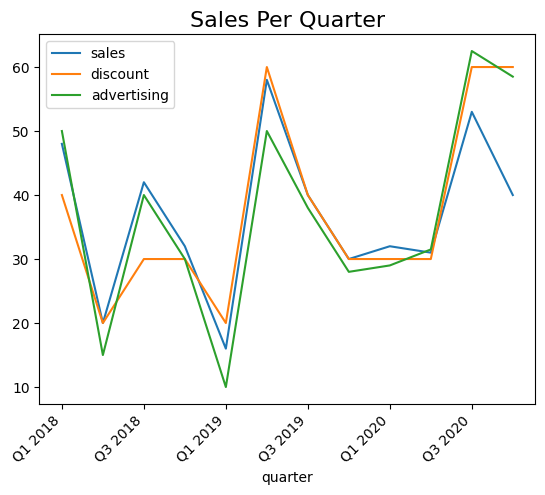

In [ ]:
quarters = ["Q1 2018", "Q2 2018", "Q3 2018", "Q4 2018",
            "Q1 2019", "Q2 2019", "Q3 2019", "Q4 2019",
            "Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020"]

sales = [48, 20, 42, 32,
         16, 58, 40, 30,
         32, 31, 53, 40]

discounts = [4,2,3,
             3,2,6,
             4,3,3,
             3,6,6]

discounts_scale_adjusted = [x * 10 for x in discounts]

advertising = [500,150,400,
               300,100,500,
               380,280,290,
               315,625,585]

advertising_scale_adjusted = [x / 10 for x in advertising]

data = pd.DataFrame({
    'quarter': quarters,
    'sales': sales,
    'discount': discounts_scale_adjusted,
    'advertising': advertising_scale_adjusted
})

ax = data.plot.line(x='quarter')
ax.set_title('Sales Per Quarter', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Imagine you observe a correlation as strong as in the Figure above. If you had to do this sales forecast for next month, you could simply ask your colleagues what the average discount is going to be next month and what next month’s advertising budget is, and you would be able to come up with a reasonable guess of the future sales.

Correlation Coefficient

The visual way to detect correlation is great. Yet there is a more exact way to investigate relationships between variables: the correlation coefficient. The correlation coefficient is a very important measure in statistics and machine learning as it determines how much two variables are correlated.

A correlation matrix is a matrix that contains the correlations between each pair of variables in a dataset. This is how to obtain a correlation matrix.

In [ ]:
# The previous data setup is already correct for plotting.
# To compute correlation, you must select only the numeric columns.

# Ensure the data frame is the one with the explanatory variables
quarters = ["Q1 2018", "Q2 2018", "Q3 2018", "Q4 2018",
             "Q1 2019", "Q2 2019", "Q3 2019", "Q4 2019",
             "Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020"]
sales = [48, 20, 42, 32, 16, 58, 40, 30, 32, 31, 53, 40]
discounts = [4,2,3, 3,2,6, 4,3,3, 3,6,6]
advertising = [500,150,400, 300,100,500, 380,280,290, 315,625,585]

# Scale adjusted data
discounts_scale_adjusted = [x * 10 for x in discounts]
advertising_scale_adjusted = [x / 10 for x in advertising]

data = pd.DataFrame({
    'quarter': quarters,
    'sales': sales,
    'discount': discounts_scale_adjusted,  # This is the scaled discount
    'advertising': advertising_scale_adjusted # This is the scaled advertising
})

# --- Fix: Select only the numeric columns for correlation ---
# 'quarter' is a string column and will be excluded or cause an error.
correlation_matrix = data[['sales', 'discount', 'advertising']].corr()

# Display the correlation matrix
print(correlation_matrix)

                sales  discount  advertising
sales        1.000000  0.848135     0.902568
discount     0.848135  1.000000     0.920958
advertising  0.902568  0.920958     1.000000


A correlation coefficient is always between -1 and 1. A positive value for the
correlation coefficient means that two variables are positively correlated: if one is higher, then the other is generally also higher. If the correlation coefficient is negative, there is a negative correlation: if one value is higher, then the other is generally lower. This is the direction of the correlation.

There is also a notion of the strength of the correlation. A correlation that is close to 1 or close to -1 is strong. A correlation coefficient that is close to 0 is a weak correlation. Strong correlations are generally more interesting, as an explanatory variable that strongly correlated to your variable can be used for forecasting it.

**WARNING:** Don't **BELIEVE** in correlation !!!

https://stats.stackexchange.com/questions/41734/attainable-correlations-for-lognormal-random-variables

# Model Evaluation for Forecasting

You need objective measures of performance to decide which forecast to retain as your actual forecast.

Let’s look at a purely hypothetical example with stock prices per month of the year 2020 and the forecast that someone has made for this. Assume that this forecast has been made in December 2019 for the complete year and that it has not been updated since.

You can already see that there is quite some difference between the actual values and the forecasted values. But that happens. Let’s start with getting the data into Python and plotting the two lines:

# Getting the stock data example into Python.

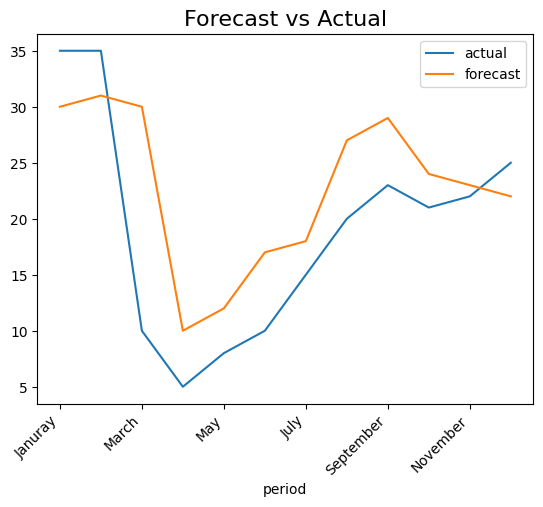

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

period = ['Januray', 'February', 'March',
         'April', 'May', 'June',
         'July', 'August', 'September',
         'October', 'November', 'December']

actual = [35, 35, 10,
          5, 8, 10,
          15, 20, 23,
          21, 22, 25]

forecast = [30, 31, 30,
              10, 12, 17,
              18, 27, 29,
              24, 23, 22]

data = pd.DataFrame({
    'period': period,
    'actual': actual,
    'forecast': forecast
})

ax = data.plot.line(x='period')
ax.set_title('Forecast vs Actual', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()


Now the next simple step is to compute the differences between each forecasted
value and each actual value
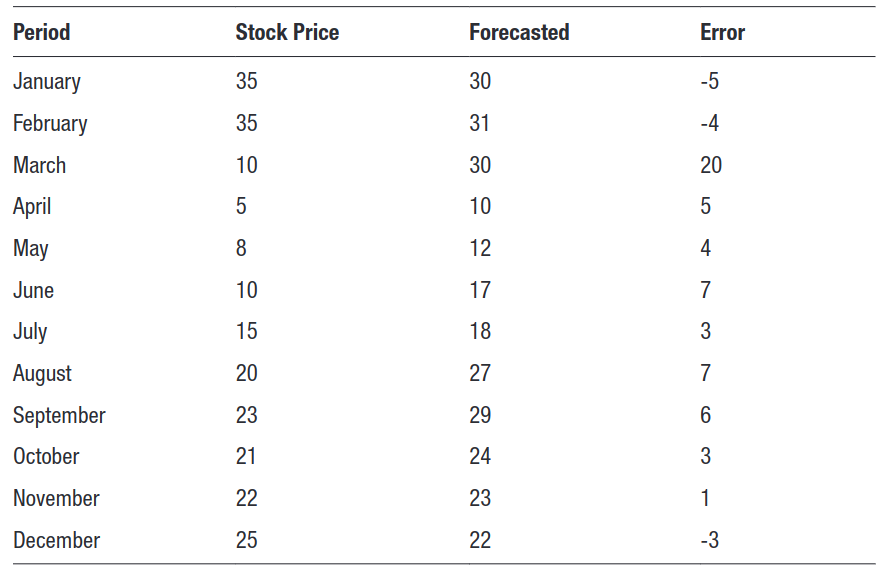

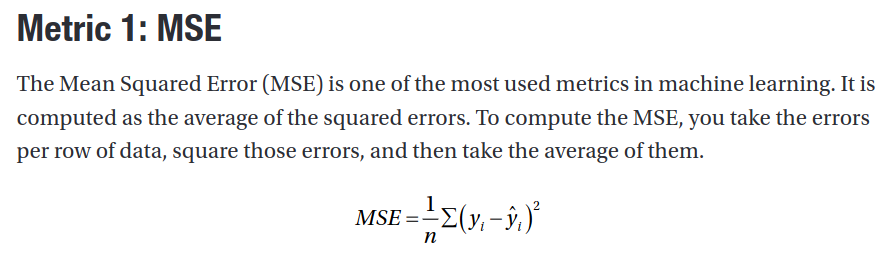

# Computing the Mean Squared Error in Python.

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(data['actual'], data['forecast']))


53.666666666666664


For the current example, this gives a MSE of 53.7.
The logic behind this error metric is multifold. First, you can understand the reason that the squared errors are used rather than the original errors, as it would be impossible to sum the original errors. Since there are positive and negative values in the original errors, they would cancel each other out. Imagine a case with one large negative error and one large positive error: the sum of the two errors might be close to zero, which is clearly wrong. The square of a value is always positive, which is why this is one possibility
to counter this.

A second part of the formula that you can understand is that it functions as an
average. You take the sum of all values and divide by the number of observations. In the MSE, you take the average of the squared errors.
The MSE error metric is great for comparing different models on the same dataset. The scale of the MSE will be the same for each model applied to the same dataset. However, the scale of the metric is not very intuitive, which makes it difficult to interpret outside of benchmarking multiple models.

The MSE is an error metric, so it should be interpreted as follows: the smaller the error, the better the model. It is not possible to convert this into an accuracy measure, because of the lack of a fixed scale of the metric. There are no upper bounds to the error, so it should really be used for comparison only.

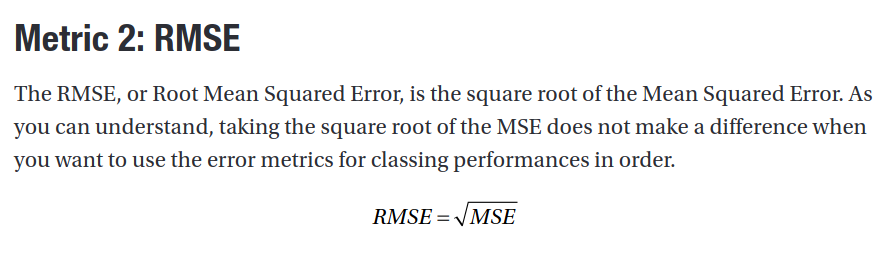

# Computing the Root Mean Squared Error in Python.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(sqrt(mean_squared_error(data['actual'], data['forecast'])))


7.32575365861197


As the RMSE is an error measure, a lower RMSE indicates a better model.
Although the RMSE is more intuitively understandable, its scale is still dependent on the actual values. This makes it impossible to compare the RMSE values of different datasets with one another, just like the MSE.

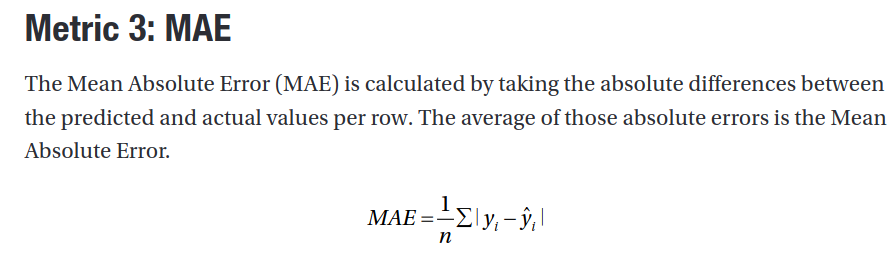

# Computing the Mean Absolute Error in Python.

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(data['actual'], data['forecast']))


5.666666666666667


The MAE takes the absolute values of the errors before averaging. Taking the average of absolute errors is a way to make sure that summing the errors will not make them cancel each other out.
You have seen the MSE using the square of the errors to avoid this, and the MAE is an alternative to this. The MAE has a more intuitive formula: it is the error metric that most people intuitively come up with. Yet the RMSE is generally favored over the MAE.

Since the RMSE uses squares rather than absolute values, the RMSE is easier to
use in mathematical computations that demand to take derivatives. The derivative of squared errors is much easier to compute than the derivative of absolute errors. Since the derivative is a much used function in optimization and minimization, this is an important criterion.

The interpretation of the MAE is comparable to the interpretation of the RMSE. They both yield scores that are in the same range of values as the actual values. There will always be a difference in the MAE and the MSE. When using the squared errors, if one of the individual errors is very high, this value may weigh stronger in the total evaluation.
Yet there is not a definite way to judge whether one of the error measures is better or worse than the other.
You can compute the Mean Absolute Error in Python using the code in Listing 2-4.
You should obtain an MAE of 5.67.

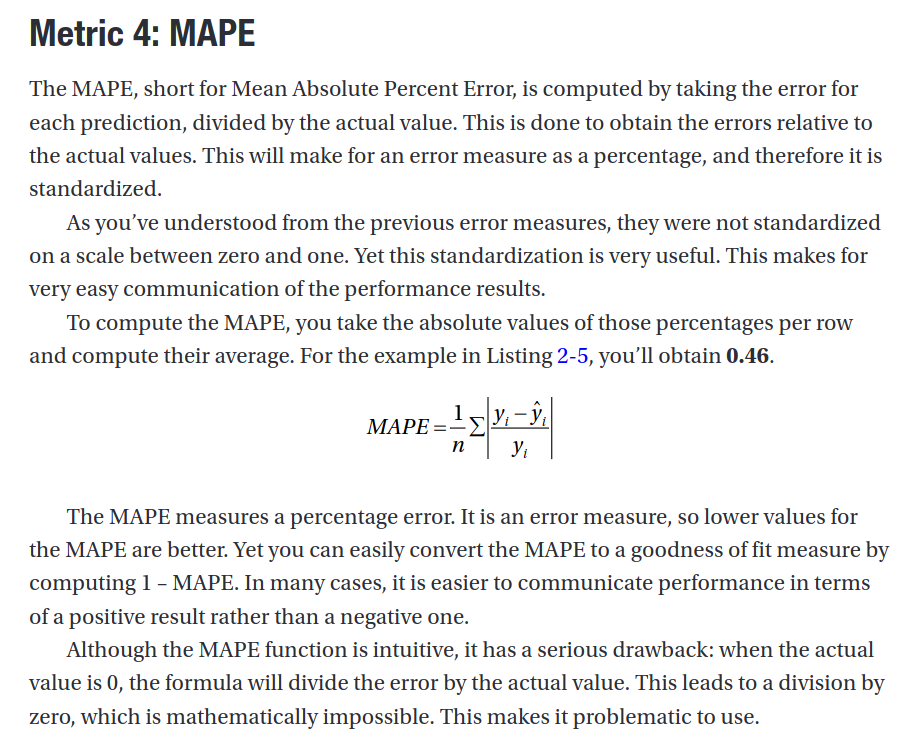

# Computing the Mean Absolute Percent Error in Python.


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(data['actual'], data['forecast']))


0.46469367588932814


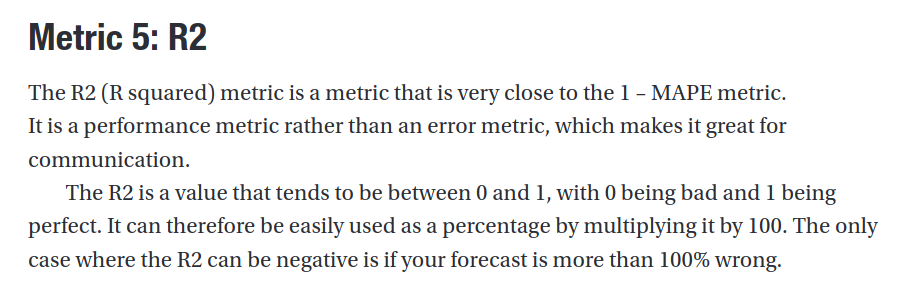

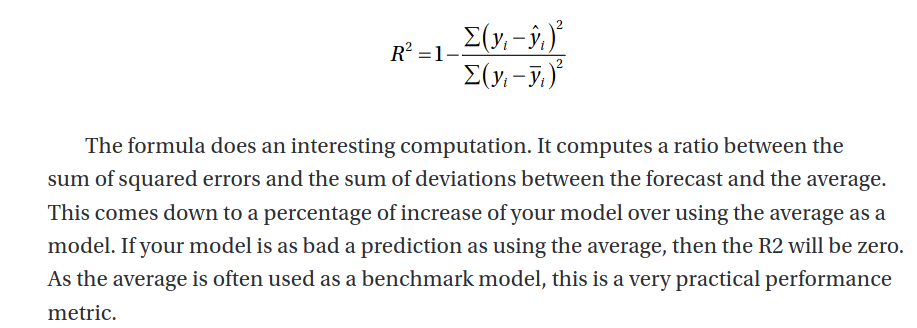

# Computing the R2 in Python.

In [ ]:
from sklearn.metrics import r2_score
r2_score(data['actual'], data['forecast'])


0.39976699029126206

# Real-World Example:

# Fetching ETF Historical Close Prices

In [ ]:
import yfinance as yf # Import the yfinance library for downloading financial data
import pandas as pd # Import pandas for data manipulation, especially with DataFrames

# Define the ETF tickers
tickers = ['SPY', 'TLT', 'SHY', 'GLD', 'DBO'] # List of ETF symbols to download

# Download daily adjusted close prices
data = yf.download(tickers, start='2013-01-01', end='2022-12-30')['Close'] # Download historical 'Close' prices for the specified tickers and date range

# data.to_csv('etf_prices_2013_2022.csv') # (Optional) commented out: saves the downloaded data to a CSV file

# Show sample
print(data.head()) # Display the first few rows of the downloaded DataFrame

/tmp/ipython-input-3600619544.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2013-01-01', end='2022-12-30')['Close'] # Download historical 'Close' prices for the specified tickers and date range
[*********************100%***********************]  5 of 5 completed

Ticker            DBO         GLD        SHY         SPY        TLT
Date                                                               
2013-01-02  23.022825  163.169998  69.795105  116.953903  84.788094
2013-01-03  22.952608  161.199997  69.795105  116.689598  83.639221
2013-01-04  22.970161  160.440002  69.803421  117.202072  83.965446
2013-01-07  23.014048  159.429993  69.803421  116.881844  84.000938
2013-01-08  23.075491  160.559998  69.811668  116.545494  84.554085


# Visualizing Normalized ETF Price Performance

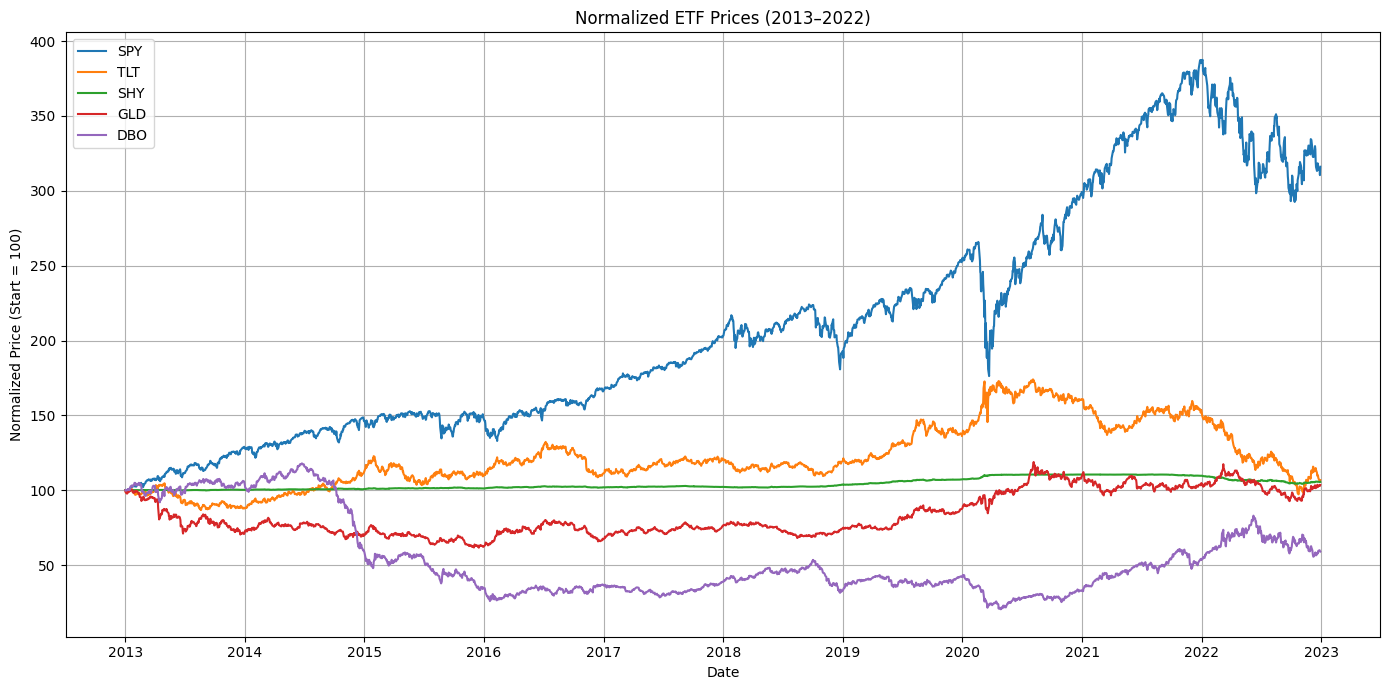

In [ ]:
import matplotlib.pyplot as plt # Import for plotting

# Normalize prices (start all at 100)
normalized_data = data / data.iloc[0] * 100 # Divide all prices by their first value and multiply by 100 to set the starting point at 100

# Plot
plt.figure(figsize=(14, 7)) # Create a new figure with a specified size
for ticker in tickers: # Loop through each ticker in your list
    plt.plot(normalized_data[ticker], label=ticker) # Plot the normalized price for each ticker

plt.title('Normalized ETF Prices (2013–2022)') # Set the title of the plot
plt.xlabel('Date') # Label the x-axis as 'Date'
plt.ylabel('Normalized Price (Start = 100)') # Label the y-axis as 'Normalized Price (Start = 100)'
plt.legend() # Display the legend to identify each ticker's line
plt.grid(True) # Add a grid to the plot for better readability
plt.tight_layout() # Adjust plot parameters for a tight layout
plt.show() # Display the generated plot

# Calculating and Summarizing Daily Logarithmic Returns

In [ ]:
import numpy as np # Import NumPy for numerical operations, specifically for log

returns = np.log(data / data.shift(1)).dropna() # Calculate daily logarithmic returns and remove any resulting NaN values
summary_stats = returns.describe() # Generate descriptive statistics (mean, std, min, max, quartiles) for the returns
print(summary_stats) # Print the summary statistics to the console

Ticker          DBO          GLD          SHY          SPY          TLT
count   2516.000000  2516.000000  2516.000000  2516.000000  2516.000000
mean      -0.000210     0.000014     0.000021     0.000457     0.000026
std        0.019986     0.009532     0.000726     0.010983     0.009114
min       -0.182065    -0.091905    -0.005101    -0.115886    -0.069010
25%       -0.009636    -0.004901    -0.000348    -0.003590    -0.005274
50%        0.001299     0.000325     0.000000     0.000650     0.000476
75%        0.010476     0.004950     0.000354     0.005524     0.005443
max        0.100955     0.047874     0.005437     0.086731     0.072502


# Plotting Daily Logarithmic Returns

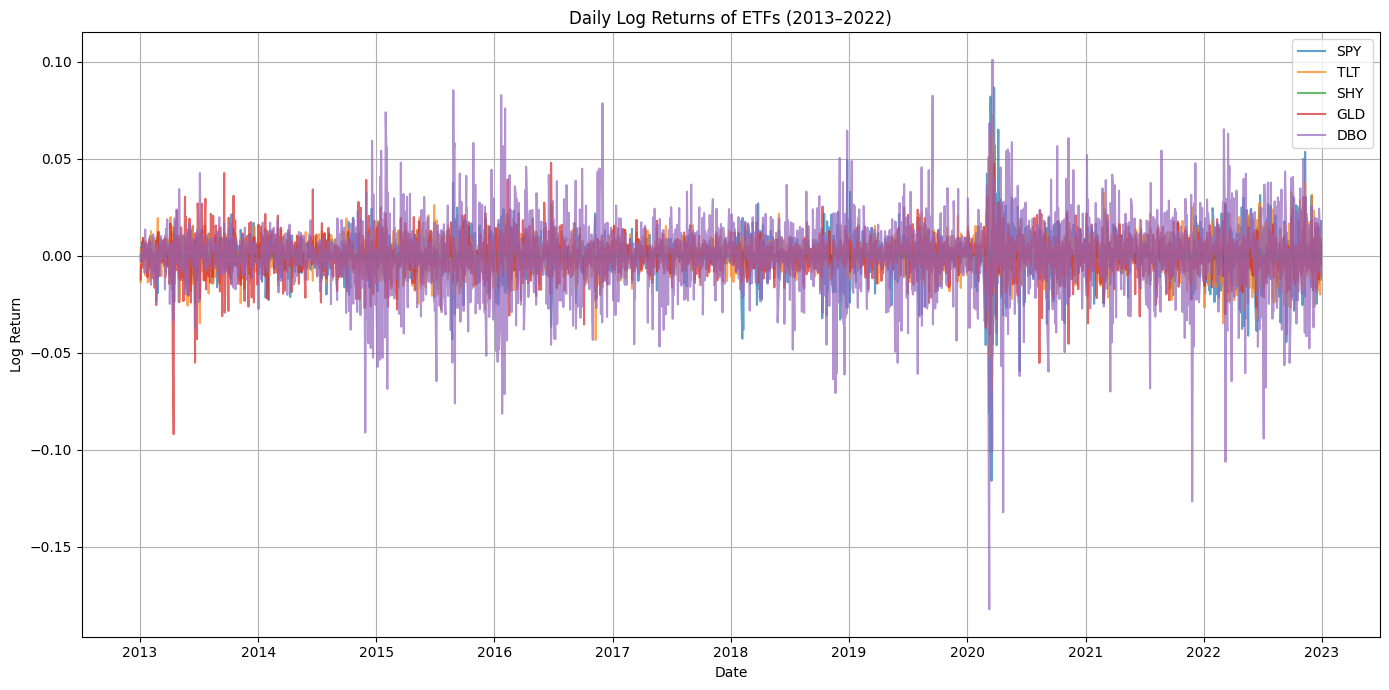

In [ ]:
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plotting

plt.figure(figsize=(14, 7)) # Create a new figure for the plot with a specified size
for ticker in tickers: # Loop through each ticker in your list
    plt.plot(returns[ticker], label=ticker, alpha=0.7) # Plot the daily log returns for each ticker with some transparency

plt.title('Daily Log Returns of ETFs (2013–2022)') # Set the title of the plot
plt.xlabel('Date') # Label the x-axis as 'Date'
plt.ylabel('Log Return') # Label the y-axis as 'Log Return'
plt.legend() # Display the legend to identify each ticker's return series
plt.grid(True) # Add a grid to the plot for better readability
plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show() # Display the generated plot

# Analyzing Return Distributions: Visuals and Statistical Tests

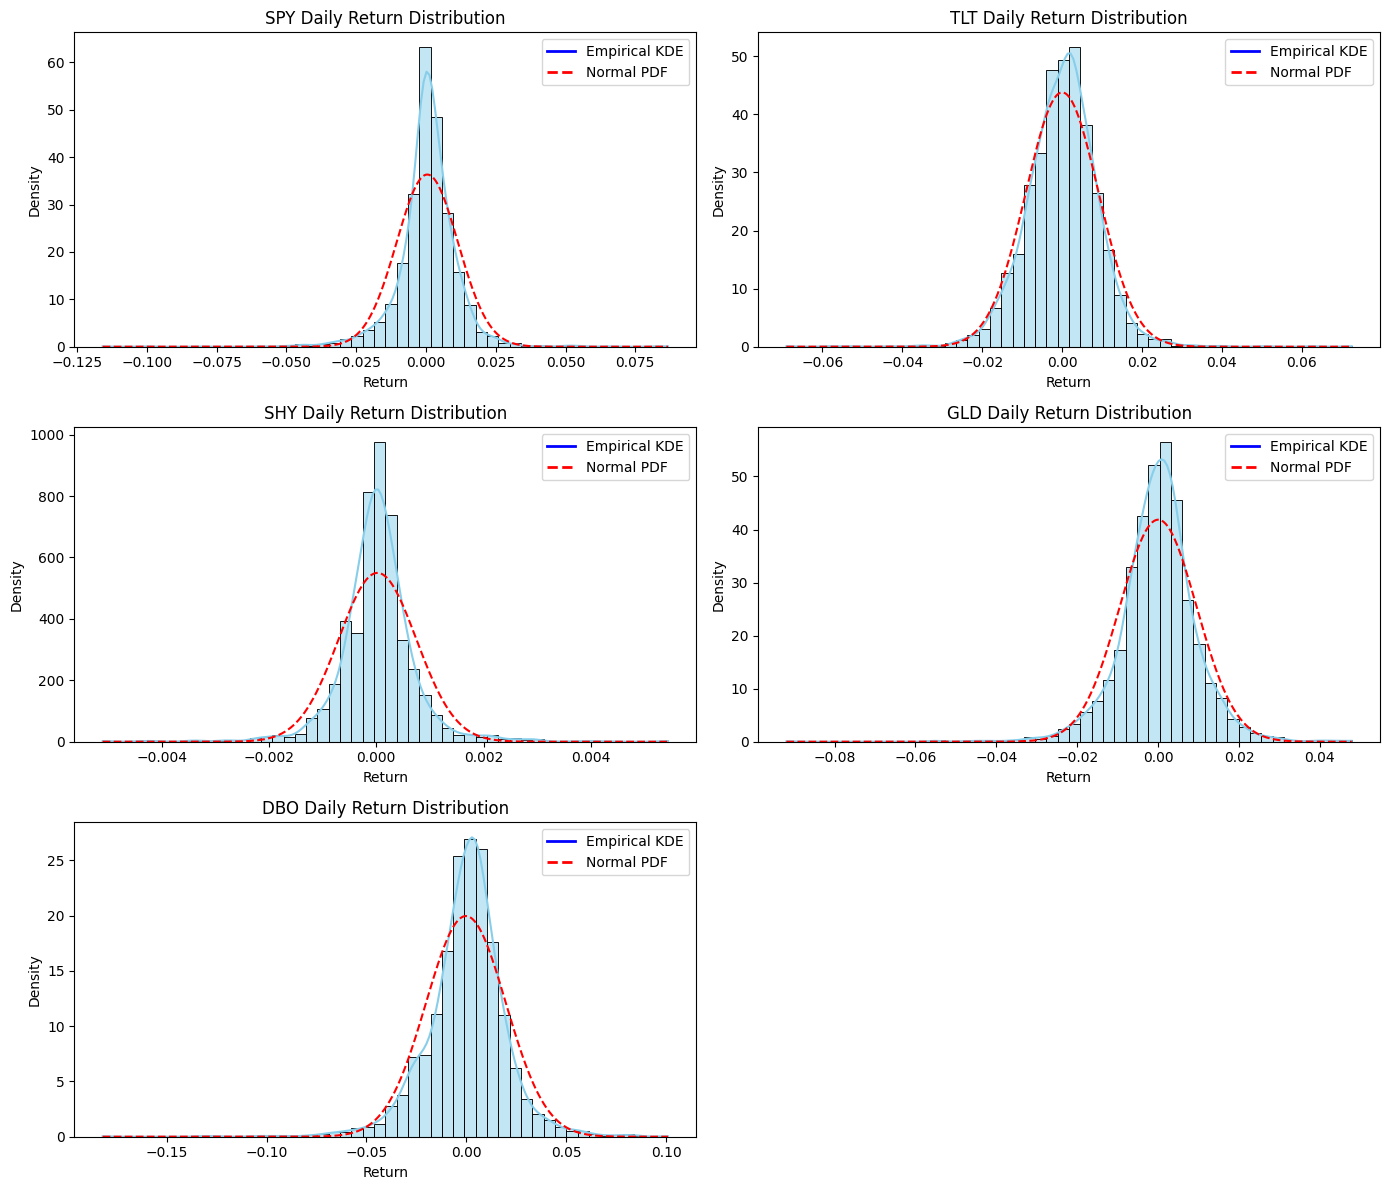


--- ADF Test Results ---
SPY: ADF Statistic = -15.8170, p-value = 0.0000 → Stationary
TLT: ADF Statistic = -9.2708, p-value = 0.0000 → Stationary
SHY: ADF Statistic = -9.6116, p-value = 0.0000 → Stationary
GLD: ADF Statistic = -49.9411, p-value = 0.0000 → Stationary
DBO: ADF Statistic = -52.8295, p-value = 0.0000 → Stationary

--- Jarque-Bera Normality Test Results ---
SPY: JB Statistic = 22302.4485, p-value = 0.0000, Skewness = -0.8352, Kurtosis = 14.4897 → Not Normal (Reject H0)
TLT: JB Statistic = 3320.3700, p-value = 0.0000, Skewness = -0.0462, Kurtosis = 5.6271 → Not Normal (Reject H0)
SHY: JB Statistic = 8689.4053, p-value = 0.0000, Skewness = 0.1078, Kurtosis = 9.1017 → Not Normal (Reject H0)
GLD: JB Statistic = 4269.5160, p-value = 0.0000, Skewness = -0.5489, Kurtosis = 6.2866 → Not Normal (Reject H0)
DBO: JB Statistic = 4324.8713, p-value = 0.0000, Skewness = -0.7437, Kurtosis = 6.2484 → Not Normal (Reject H0)


In [ ]:
import matplotlib.pyplot as plt # Import for plotting
import seaborn as sns # Import for enhanced visualizations, especially histograms
import numpy as np # Import for numerical operations
from scipy.stats import norm, jarque_bera, skew, kurtosis # Import statistical functions: normal PDF, Jarque-Bera test, skewness, and kurtosis
from matplotlib.lines import Line2D # Import for creating custom legend entries
from statsmodels.tsa.stattools import adfuller # Import for the Augmented Dickey-Fuller test

# --- Plotting Daily Return Distributions ---
fig, axes = plt.subplots(3, 2, figsize=(14, 12)) # Create a figure and a grid of 3x2 subplots
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, ticker in enumerate(tickers): # Loop through each ticker with its index
    # Get data
    data_series = returns[ticker] # Select the return data for the current ticker
    mean = data_series.mean() # Calculate the mean of the return series
    std = data_series.std() # Calculate the standard deviation of the return series

    # Plot histogram and KDE
    sns.histplot(data_series, kde=True, bins=50, stat='density', ax=axes[i], color='skyblue', edgecolor='black') # Plot a histogram with a Kernel Density Estimate (KDE)

    # Generate x values for normal PDF
    x = np.linspace(data_series.min(), data_series.max(), 1000) # Create 1000 evenly spaced points for PDF plotting
    y = norm.pdf(x, mean, std) # Calculate the Probability Density Function (PDF) values for a normal distribution

    # Plot normal PDF (red dashed line)
    axes[i].plot(x, y, color='red', linestyle='--') # Overlay the theoretical normal distribution PDF

    # Add legend
    custom_lines = [ # Define custom lines for the legend
        Line2D([0], [0], color='blue', lw=2, label='Empirical KDE'), # Legend entry for the empirical KDE
        Line2D([0], [0], color='red', linestyle='--', lw=2, label='Normal PDF') # Legend entry for the normal PDF
    ]
    axes[i].legend(handles=custom_lines) # Display the custom legend on the subplot

    axes[i].set_title(f'{ticker} Daily Return Distribution') # Set the title of the subplot
    axes[i].set_xlabel('Return') # Set the x-axis label
    axes[i].set_ylabel('Density') # Set the y-axis label

# Hide any unused subplots
if len(tickers) < len(axes): # Check if there are fewer tickers than subplots
    for j in range(len(tickers), len(axes)): # Loop through and remove unused subplots
        fig.delaxes(axes[j])

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show() # Display the plot


## ADF Test Results

#This section performs the Augmented Dickey-Fuller (ADF) test to check for stationarity in your return series.


print("\n--- ADF Test Results ---") # Print a header for the ADF test results
for ticker in tickers: # Loop through each ticker to perform the ADF test
    result = adfuller(returns[ticker]) # Perform the Augmented Dickey-Fuller test
    adf_stat = result[0] # Extract the ADF test statistic
    p_value = result[1] # Extract the p-value from the ADF test
    is_stationary = "Stationary" if p_value < 0.05 else "Not Stationary" # Determine stationarity based on p-value
    print(f'{ticker}: ADF Statistic = {adf_stat:.4f}, p-value = {p_value:.4f} → {is_stationary}') # Print the ADF test results


print("\n--- Jarque-Bera Normality Test Results ---") # Print a header for the Jarque-Bera test results
for ticker in tickers: # Loop through each ticker to perform the Jarque-Bera test
    try: # Try to unpack all four values (for newer SciPy versions)
        jb_test_statistic, jb_p_value, skewness_val, kurtosis_val = jarque_bera(returns[ticker])
    except ValueError: # If unpacking fails (older SciPy versions)
        jb_test_statistic, jb_p_value = jarque_bera(returns[ticker]) # Unpack only two values
        skewness_val = skew(returns[ticker]) # Calculate skewness separately
        kurtosis_val = kurtosis(returns[ticker])  # Calculate kurtosis separately (renamed to avoid shadowing)

    is_normal = "Normal (Fail to reject H0)" if jb_p_value >= 0.05 else "Not Normal (Reject H0)" # Determine normality based on p-value
    print(f'{ticker}: JB Statistic = {jb_test_statistic:.4f}, p-value = {jb_p_value:.4f}, '
          f'Skewness = {skewness_val:.4f}, Kurtosis = {kurtosis_val:.4f} → {is_normal}') # Print the Jarque-Bera test results

# Visualizing Return Correlations with a Heatmap

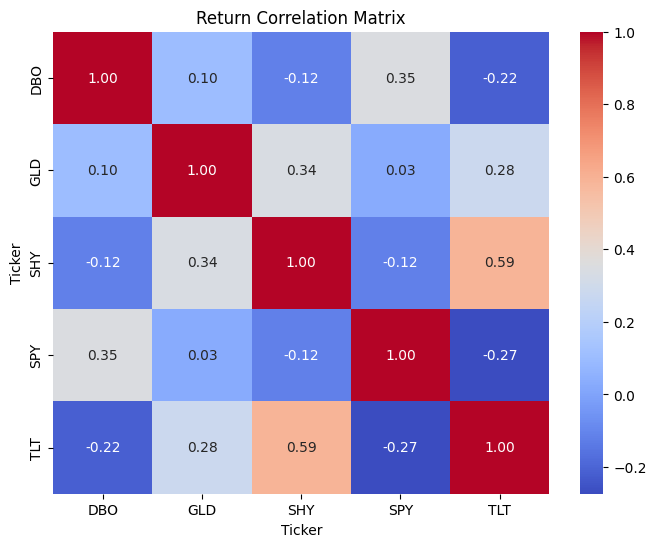

In [ ]:
import seaborn as sns # Ensure seaborn is imported for creating the heatmap
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plotting

# Correlation heatmap
plt.figure(figsize=(8, 6)) # Create a new figure with a specified size for the heatmap
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', fmt=".2f") # Generate a heatmap of the correlation matrix of returns
plt.title('Return Correlation Matrix') # Set the title of the heatmap
plt.show() # Display the generated heatmap

# Analyzing Rolling Return Correlations Across Multiple Windows

/tmp/ipython-input-258228716.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2013-01-01', end='2022-12-30')['Close'] # Download daily closing prices for the specified tickers and date range
[*********************100%***********************]  5 of 5 completed


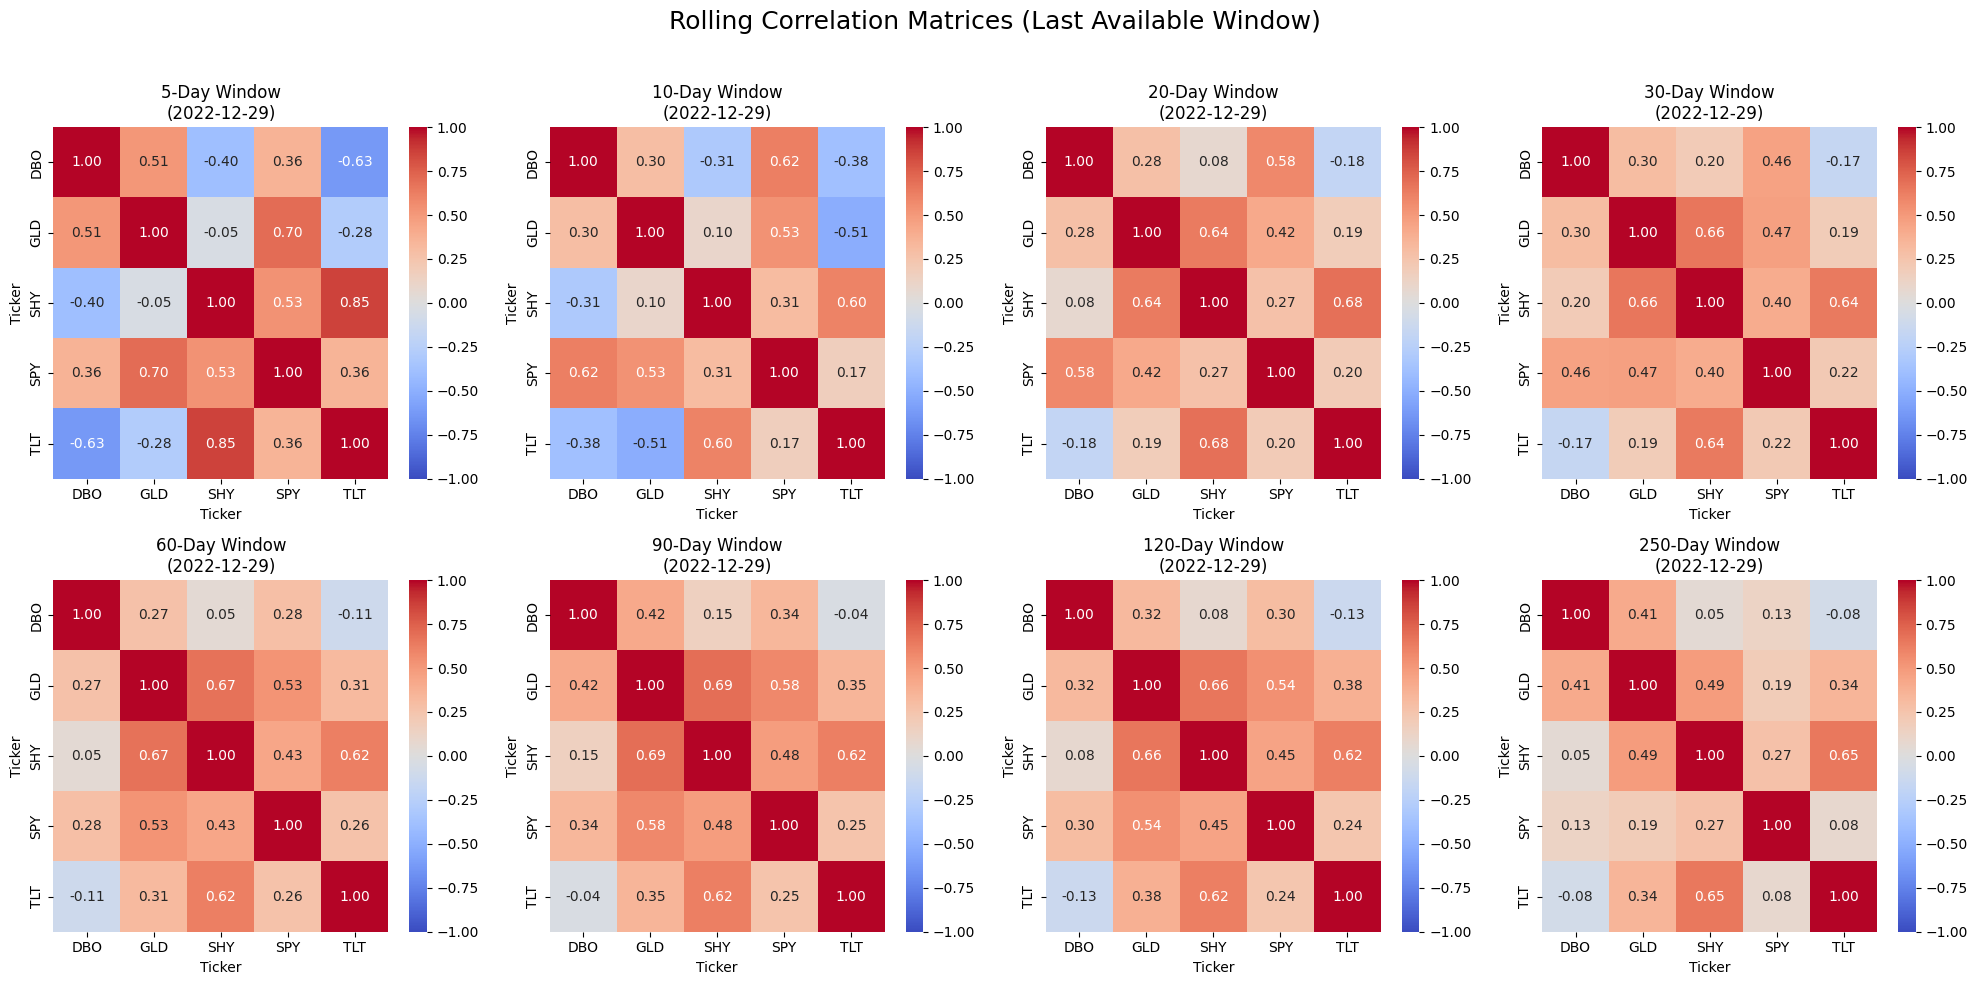

In [ ]:
import yfinance as yf # Import yfinance to download financial data
import pandas as pd # Import pandas for data manipulation
import numpy as np # Import numpy for numerical operations
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns # Import seaborn for enhanced visualizations, especially heatmaps

# 1. Download data
tickers = ['SPY', 'TLT', 'SHY', 'GLD', 'DBO'] # Define the list of ETF tickers
data = yf.download(tickers, start='2013-01-01', end='2022-12-30')['Close'] # Download daily closing prices for the specified tickers and date range

# 2. Calculate daily returns
returns = data.pct_change().dropna() # Calculate daily percentage returns and remove any NaN values

# 3. Define rolling windows
windows = [5, 10, 20, 30, 60, 90, 120, 250] # Define a list of different window sizes (in days) for rolling calculations

# 4. Prepare 2x4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10)) # Create a figure and a 2x4 grid of subplots
axes = axes.flatten() # Flatten the 2D array of axes into a 1D array for easy iteration

fig.suptitle('Rolling Correlation Matrices (Last Available Window)', fontsize=18) # Set a main title for the entire figure

# 5. Loop through windows and plot correlation heatmaps
for i, window in enumerate(windows): # Iterate through each window size with its index
    # Compute rolling correlation (multi-index DataFrame)
    rolling_corr = returns.rolling(window).corr() # Calculate the rolling correlation matrix for the current window size

    # Get the last valid date
    last_date = rolling_corr.dropna().index.get_level_values(0).max() # Find the last date for which a full correlation matrix is available

    # Extract correlation matrix for the last available date
    matrix = rolling_corr.loc[last_date] # Select the correlation matrix corresponding to the last available date

    # Plot heatmap with individual colorbar
    ax = axes[i] # Select the current subplot
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax, # Plot the heatmap on the current subplot
                vmin=-1, vmax=1, cbar=True) # Set color bar limits from -1 to 1 and display it
    ax.set_title(f'{window}-Day Window\n({last_date.date()})') # Set the title of the subplot, indicating window size and date

# Clean up any unused subplots (not needed here as there are 8 windows for 8 subplots, but good practice)
for j in range(len(windows), len(axes)): # Loop through any remaining unused subplots
    fig.delaxes(axes[j]) # Remove the unused subplot

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust subplot parameters for a tight layout, leaving space for the suptitle
plt.show() # Display the generated figure with all heatmaps

# Model Evaluation Strategies

## Strategy 1: Train-Test Split

## Strategy 2: Train-Validation-Test Split

## Strategy 3: Cross-Validation for Forecasting


# Train Test Split in Python.

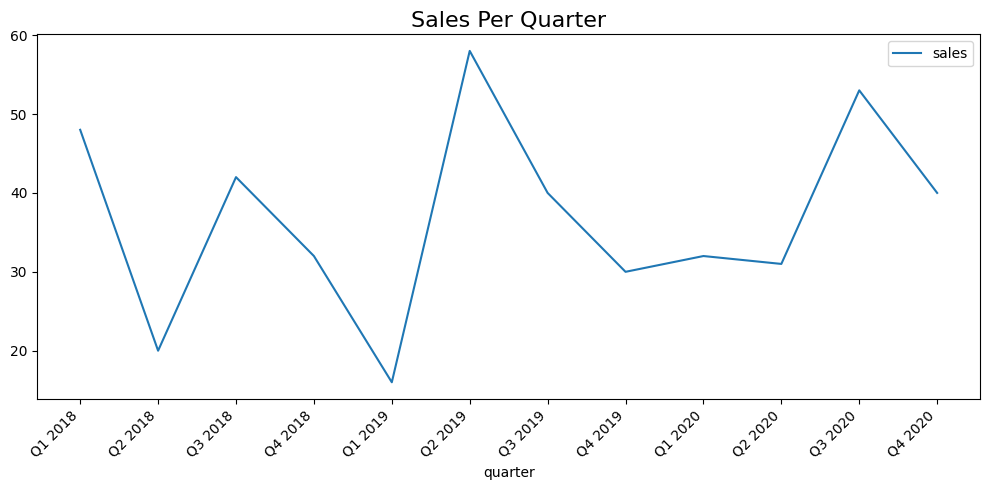

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

quarters = ["Q1 2018", "Q2 2018", "Q3 2018", "Q4 2018",
            "Q1 2019", "Q2 2019", "Q3 2019", "Q4 2019",
            "Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020"]

sales = [48, 20, 42, 32,
         16, 58, 40, 30,
         32, 31, 53, 40]

discounts = [4,2,3,
             3,2,6,
             4,3,3,
             3,6,6]

advertising = [500,150,400,
               300,100,500,
               380,280,290,
               315,625,585]

data = pd.DataFrame({
    'quarter': quarters,
    'sales': sales,
    'discount': discounts,
    'advertising': advertising
})

fig, ax = plt.subplots(figsize=(10, 5))
data.plot.line(x='quarter', y='sales', ax=ax)
ax.set_title('Sales Per Quarter', fontsize=16)

# FIX: Explicitly set the tick locations (indices)
ax.set_xticks(range(len(data['quarter'])))
ax.set_xticklabels(data['quarter'], rotation=45, ha='right')
plt.tight_layout()
plt.show() # Plot saved as sales_per_quarter_plot.png

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# --- Necessary data for 'actual' column, based on previous context ---
actual = [35, 35, 10, 5, 8, 10, 15, 20, 23, 21, 22, 25] # 12 periods total
# Create a dummy DataFrame just to hold 'actual'
data_stock = pd.DataFrame({'actual': actual})

y = data_stock['actual']
# Split with shuffle=False for time series
train, test = train_test_split(y, test_size=0.3, shuffle=False)

forecast = train.mean() # This is the simple mean forecast

# Calculate train error
train = pd.DataFrame(train)
train['forecast'] = forecast
train_error = mean_squared_error(train['actual'], train['forecast'])

# Calculate test error
test = pd.DataFrame(test)
test['forecast'] = forecast
test_error = mean_squared_error(test['actual'], test['forecast'])

print(train_error, test_error)
# Output: 122.9375 32.4375

122.9375 32.4375


# Train Validation Test Split in Python.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# --- Assuming 'data_stock' from previous context is available ---
# data_stock = pd.DataFrame({'actual': [35, 35, 10, 5, 8, 10, 15, 20, 23, 21, 22, 25]})
data = data_stock # Use 'data' as in the snippet for consistency

# 1. Splitting into 70% train, 15% validation and 15% test
# First split: 70% train (index 0-8), 30% temp_test (index 9-11)
train, temp_test = train_test_split(data['actual'], test_size=0.3, shuffle=False)

# Second split: temp_test (30%) into two halves (15% val, 15% test)
# Since temp_test has 4 values, 0.5 splits it into 2 values each (index 9-10 and 11-12)
val, test = train_test_split(temp_test, test_size=0.5, shuffle=False)

# 2. Fit (estimate) the two baseline models on the train data
forecast_mean = train.mean()
forecast_median = train.median()

# 3. Compute MSE on validation data for both models (Model Selection)
val = pd.DataFrame(val) # Convert Series back to DataFrame

val['forecast_mean'] = forecast_mean
val['forecast_median'] = forecast_median

mean_val_mse = mean_squared_error(val['actual'], val['forecast_mean'])
median_val_mse = mean_squared_error(val['actual'], val['forecast_median'])

# Display validation MSEs
print(f"Validation MSE (Mean Model): {mean_val_mse}")
print(f"Validation MSE (Median Model): {median_val_mse}")

# 4. Final Evaluation on Test Data (Using the best model, which is the mean)
# The mean model performed better (23.56 < 91.25), so we use it for the final test
test = pd.DataFrame(test) # Convert Series back to DataFrame
test['forecast_mean'] = forecast_mean

mean_test_mse = mean_squared_error(test['actual'], test['forecast_mean'])

# Display test MSE
print(f"Test MSE (Mean Model): {mean_test_mse}")

Validation MSE (Mean Model): 23.5625
Validation MSE (Median Model): 91.25
Test MSE (Mean Model): 41.3125


# K-fold cross-validation


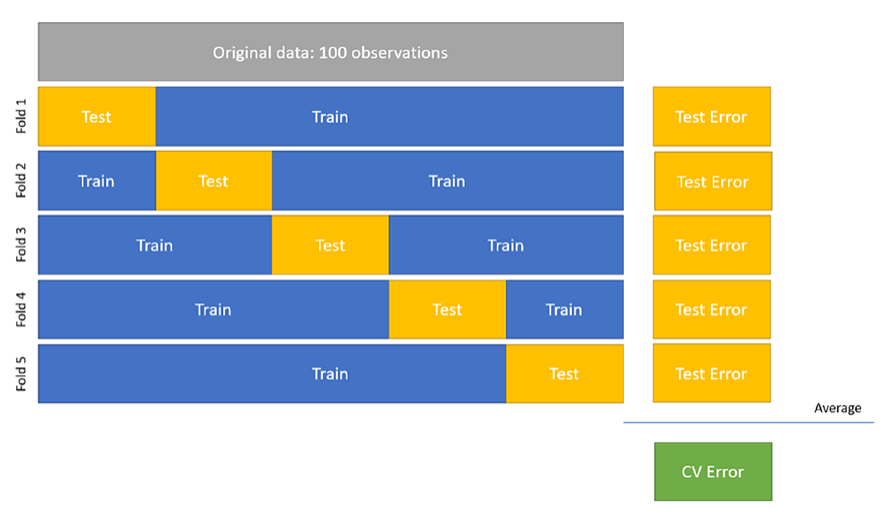

# K-fold cross-validation in Python.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit # FIX: Use TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# --- ASSUMPTION: data DataFrame contains 'actual' column ---
# If your previous code used data_stock, ensure it is named 'data' here,
# e.g., data = data_stock
# Example data structure (from previous context):
# data = pd.DataFrame({'actual': [35, 35, 10, 5, 8, 10, 15, 20, 23, 21, 22, 25]})

# Initialize TimeSeriesSplit: 5 splits means 5 different train/test periods.
# Each test set is an equal size block *after* its corresponding train set.
tscv = TimeSeriesSplit(n_splits=5)

errors = []
# The split method automatically yields chronological indices
for train_index, test_index in tscv.split(data):
    # Use .iloc to slice the DataFrame based on the indices
    train = data.iloc[train_index,:]
    test = data.iloc[test_index,:]

    # Model: Simple mean of the chronological training data
    pred = train['actual'].mean()

    # Calculate error on the chronological test data
    # Create a copy to avoid SettingWithCopyWarning
    test_copy = test.copy()
    test_copy['forecast'] = pred

    error = mean_squared_error(test_copy['actual'], test_copy['forecast'])
    errors.append(error)

# Print the final average MSE across all 5 folds
print(f"Average Cross-Validation MSE (TimeSeriesSplit): {np.mean(errors)}")

Average Cross-Validation MSE (TimeSeriesSplit): 194.76522222222223


# Time Series Cross-Valdiation in Python


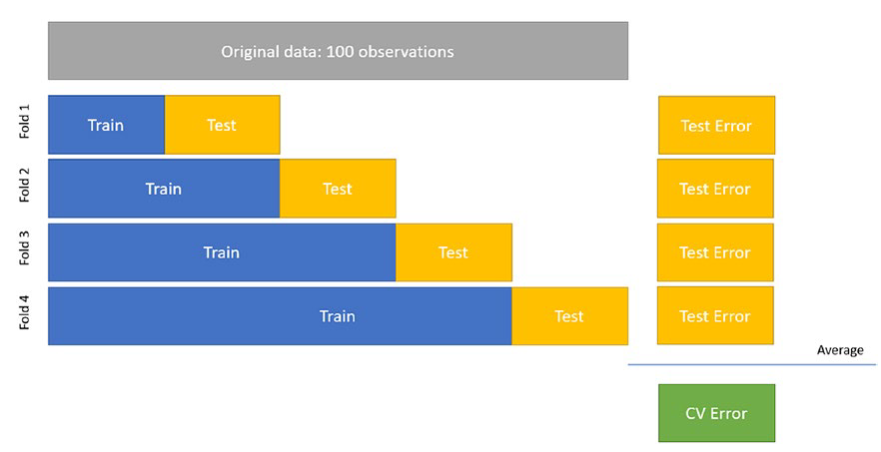

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# --- ASSUMPTION: Re-creating the necessary data DataFrame (data_stock) ---
# This data structure is required for the 'actual' column to exist.
actual = [35, 35, 10,
          5, 8, 10,
          15, 20, 23,
          21, 22, 25]
data = pd.DataFrame({'actual': actual})

# TimeSeriesSplit defaults to n_splits=5 (which is generally sufficient for 12 data points)
tscv = TimeSeriesSplit()

errors = []
for train_index, test_index in tscv.split(data):
    # .iloc is used to get the chronological slices of the data
    train = data.iloc[train_index,:]
    test = data.iloc[test_index,:]

    # Model: Calculate the mean of the training data (a naive forecast)
    pred = train['actual'].mean()

    # Calculate error on the test data
    # FIX: Use .copy() to avoid the SettingWithCopyWarning
    test_copy = test.copy()
    test_copy['forecast'] = pred

    error = mean_squared_error(test_copy['actual'], test_copy['forecast'])
    errors.append(error)

# Print the final average MSE across all folds
average_mse = np.mean(errors)
print(f"Individual Fold MSEs: {errors}")
print(f"Average Cross-Validation MSE: {average_mse}")

Individual Fold MSEs: [762.5, 151.0625, 6.361111111111111, 23.5625, 30.340000000000007]
Average Cross-Validation MSE: 194.76522222222223


# Rolling Time Series Cross-Validation

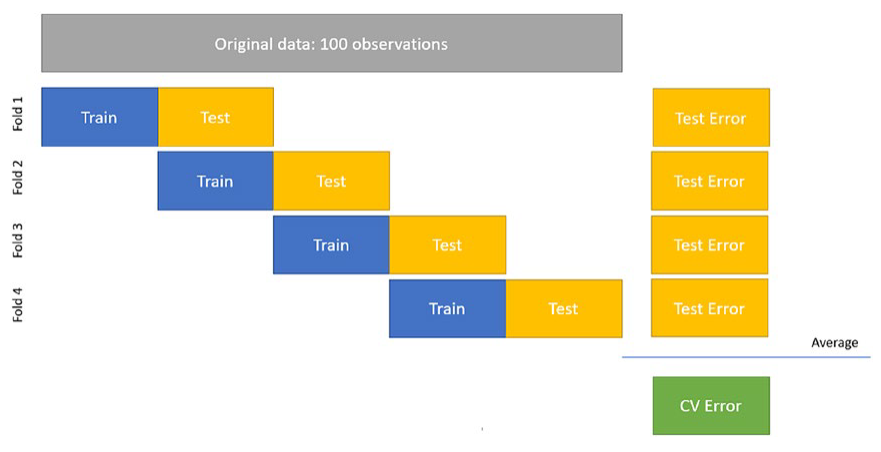

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# --- ASSUMPTION: Re-creating the necessary data DataFrame (data) ---
# Total data points (n) = 12
actual = [35, 35, 10,
          5, 8, 10,
          15, 20, 23,
          21, 22, 25]
data = pd.DataFrame({'actual': actual})

# TimeSeriesSplit configuration:
# n_splits defaults to 5.
# max_train_size = 2 means the training set will never grow larger than 2 observations.
tscv = TimeSeriesSplit(max_train_size=2)

errors = []
# tscv.split(data) yields (n_samples - n_splits) = 12 - 5 = 7 folds in this configuration,
# with fold sizes that respect max_train_size=2.
for train_index, test_index in tscv.split(data):

    train = data.iloc[train_index,:]
    test = data.iloc[test_index,:]

    # Model: Calculate the mean of the training data
    pred = train['actual'].mean()

    # Calculate error on the test data
    # FIX: Use .copy() to avoid the SettingWithCopyWarning
    test_copy = test.copy()
    test_copy['forecast'] = pred

    error = mean_squared_error(test_copy['actual'], test_copy['forecast'])
    errors.append(error)

average_mse = np.mean(errors)
print(f"Individual Fold MSEs: {errors}")
print(f"Average Cross-Validation MSE: {average_mse}")

Individual Fold MSEs: [762.5, 3.25, 78.5, 21.25, 4.5]
Average Cross-Validation MSE: 174.0


# INFO on Cross-Validation:

https://medium.com/@ahmedfahad04/understanding-walk-forward-validation-in-time-series-analysis-a-practical-guide-ea3814015abf

https://pub.towardsai.net/the-combinatorial-purged-cross-validation-method-363eb378a9c5

https://pub.towardsai.net/combinatorial-purgedkfold-cross-validation-for-deep-reinforcement-learning-f8df689ca874

# Standard K-Fold CV

Randomly splits data into K folds.
Simple and fast.
Assumes i.i.d., causes leakage in time series.
Not suitable for financial time series data.

# Walk-Forward CV

Trains on past, tests on future in time order.
Realistic for trading/backtesting.
Tests only one path, can miss regime shifts.
Common in finance.

# Purged K-Fold CV

Removes training samples that overlap with test label windows.
Prevents label leakage.
Needs label window info, reduces training size.
Effective for financial ML.

# Embargoed CV

Adds time buffer after test fold to prevent correlation leakage.
Handles serial dependency.
Shrinks training set further.
Useful when features are autocorrelated.

# Combinatorial Purged CV (CPCV)

Tests many train/test splits with purging and embargoing.
Robust to regime changes, gives distributional insight.
Very compute-heavy.
Best for strategy validation in finance


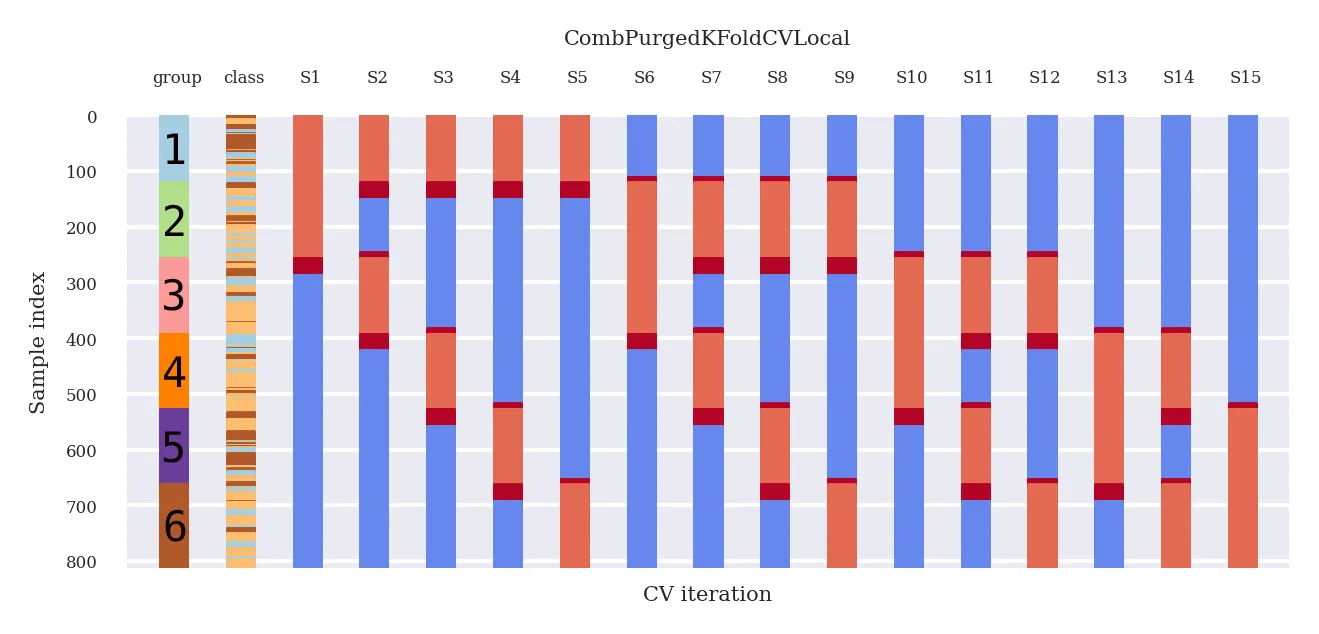